In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
lfc = pd.read_csv('../data/standardized_data/result_logfc_matrix_2020_08_27.csv')

In [3]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [4]:
lfc=lfc.dropna(axis=0)

In [5]:
mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
mbio.head()

,ORF ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.000000,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.000000,ES
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,35,32,3,0,0,35,0,0.857143,38.033333,NE
3,Rv0004,-,hypothetical protein,8,8,0,0,0,8,0,0.375000,144.000000,NE
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,40,36,4,39,0,1,0,0.025000,26.000000,ES


In [6]:
print(lfc.shape)
lfc=pd.merge(lfc, mbio[['ORF ID', 'Name', 'Description', 'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
print(lfc.shape)

(3971, 65)
(3971, 69)


In [7]:
mcbwser = pd.read_excel("../data/annotations/Mycobacterium_tuberculosis_H37Rv_txt_v3.xlsx")
mcbwser.head()

,Refseq_ID,Feature,Rv_ID,Name,Function,Product,Comments,Functional_Category
0,NC_000962.3,CDS,Rv3728,Rv3728,"Unknown, but seems involved in efflux system (...",Probable conserved two-domain membrane protein,"Rv3728, (MTV025.076), len: 1065 aa. Probable c...",cell wall and cell processes
1,NC_000962.3,CDS,Rv3729,Rv3729,Function unknown; probably involved in cellula...,Possible transferase,"Rv3729, (MTV025.077), len: 776 aa. Conserved h...",intermediary metabolism and respiration
2,NC_000962.3,CDS,Rv3730c,Rv3730c,Function unknown,Conserved hypothetical protein,"Rv3730c, (MTV025.078c), len: 346 aa. Conserved...",conserved hypotheticals
3,NC_000962.3,CDS,Rv3760,Rv3760,Unknown,Possible conserved membrane protein,"Rv3760, (MTV025.108), len: 100 aa. Possible co...",cell wall and cell processes
4,NC_000962.3,CDS,Rv3732,Rv3732,Function unknown,Conserved protein,"Rv3732, (MTV025.080), len: 352 aa. Conserved p...",conserved hypotheticals


In [8]:
mcbwser = mcbwser.drop_duplicates(subset=['Rv_ID'])

In [9]:
print(lfc.shape)
lfc=pd.merge(lfc, mcbwser[['Rv_ID', 'Functional_Category']], how='left', on='Rv_ID')
print(lfc.shape)

(3971, 69)
(3971, 70)


In [10]:
lfc=lfc.drop(columns='ORF ID')

In [11]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,Name,Description,Final Call,Functional_Category
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,0.51,0.41,1.30,-0.49,-1.26,-2.25,recF,DNA replication and repair protein RecF (singl...,NE,information pathways
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,0.00,0.00,0.00,0.70,-2.62,-2.62,-,hypothetical protein,NE,conserved hypotheticals
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,2.90,2.20,-4.05,0.30,0.69,-3.55,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways


In [12]:
desc_columns=['Rv_ID', 'Name', 'Description', 'Final Call', 'Functional_Category']
value_cols=[col for col in lfc.columns if col not in desc_columns]
lfc=lfc[desc_columns + value_cols]

In [13]:
lfc.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,-0.41,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,3.28,2.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,-0.22,0.14,0.13,-0.08,0.27,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [14]:
from sklearn.decomposition import PCA
from plotnine import *

In [15]:
pca=PCA(3)
pca_results=pca.fit_transform(lfc[value_cols])
explained_var = pca.explained_variance_
pca_df=pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])

In [16]:
lfc=lfc.merge(pca_df, left_index=True, right_index=True)

In [17]:
lfc.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,pca1,pca2,pca3
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,-0.41,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.770295,-0.242574,2.962386
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,3.28,2.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.118470,-1.456202,0.458066
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25,-5.563837,3.289118,0.380470
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62,-1.173764,7.412665,1.184241
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,-0.22,0.14,0.13,-0.08,0.27,...,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55,7.366208,6.076851,0.976328


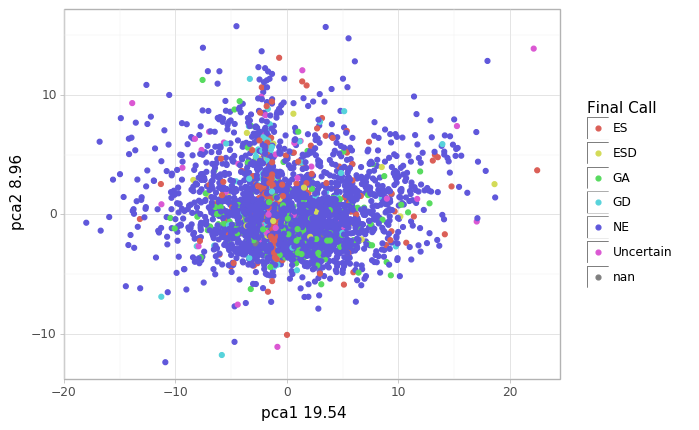

<ggplot: (8728012484077)>

In [19]:
(ggplot(lfc, aes(x='pca1', y='pca2', color='Final Call')) 
 + geom_point() 
 + theme_light() 
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

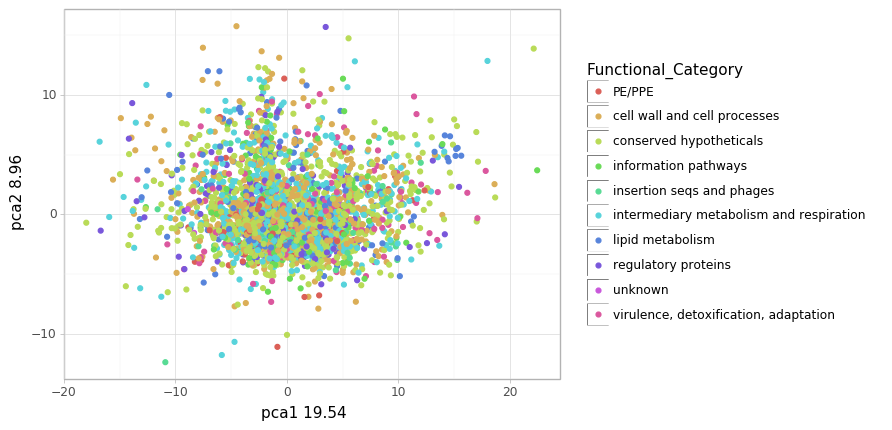

<ggplot: (8728011386861)>

In [20]:
(ggplot(lfc, aes(x='pca1', y='pca2', color='Functional_Category'))
 +geom_point()
 +theme_light()
 +xlab(f'pca1 {np.round(explained_var[0], 2)}')
 +ylab(f'pca2 {np.round(explained_var[1], 2)}'))

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2).fit_transform(lfc[value_cols])

In [23]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [24]:
lfc=lfc.merge(tsne, left_index=True, right_index=True)

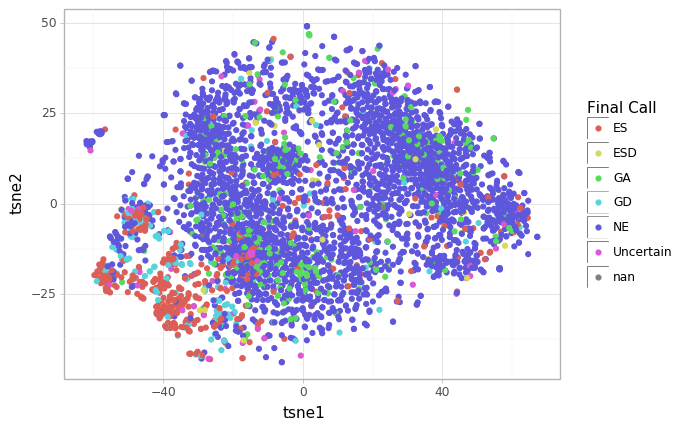

<ggplot: (8728011311773)>

In [25]:
(ggplot(lfc, aes(x='tsne1', y='tsne2', color='Final Call'))+geom_point()+theme_light())

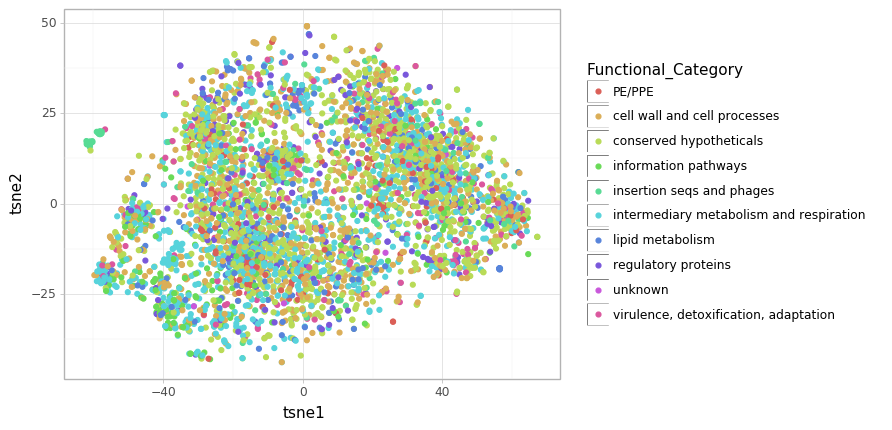

<ggplot: (8728005195605)>

In [26]:
(ggplot(lfc, aes(x='tsne1', y='tsne2', color='Functional_Category'))+geom_point()+theme_light())

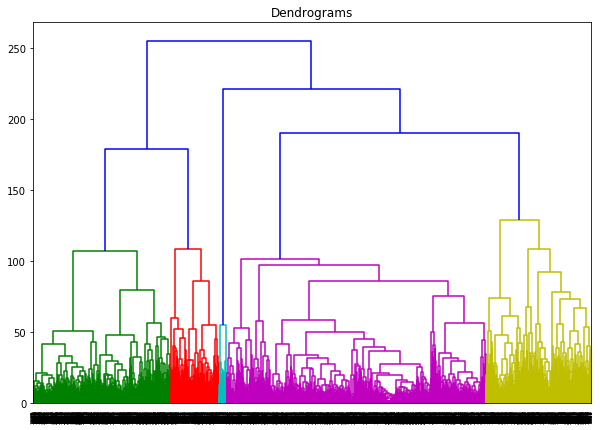

In [169]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(lfc[value_cols], method='ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(lfc[value_cols])

In [28]:
lfc['y_hc']=y_hc

In [29]:
lfc

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,pca1,pca2,pca3,tsne1,tsne2,y_hc
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,-0.41,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-2.770295,-0.242574,2.962386,-32.723267,-24.830872,3
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,3.28,2.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-1.118470,-1.456202,0.458066,-33.239185,-32.536903,3
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,-0.03,-0.08,0.03,-1.20,0.39,...,1.30,-0.49,-1.26,-2.25,-5.563837,3.289118,0.380470,-37.498623,17.218048,4
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,-3.81,-3.39,-2.60,-6.83,1.54,...,0.00,0.70,-2.62,-2.62,-1.173764,7.412665,1.184241,-19.168867,-35.174381,1
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,-0.22,0.14,0.13,-0.08,0.27,...,-4.05,0.30,0.69,-3.55,7.366208,6.076851,0.976328,64.512856,-3.981023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,Rv3920c,-,Conserved protein similar to jag protein,NE,conserved hypotheticals,0.06,0.00,0.26,-1.73,-0.05,...,2.99,0.75,-7.54,-5.43,-5.332395,7.116366,-4.444384,-11.978388,20.473137,1
3967,Rv3921c,-,Probable conserved transmembrane protein,ESD,cell wall and cell processes,1.98,1.92,0.25,0.16,0.87,...,0.00,0.00,0.00,0.00,-1.224314,-0.559954,1.442917,-29.472261,-29.565746,3
3968,Rv3922c,-,Possible hemolysin,NE,"virulence, detoxification, adaptation",-0.88,-0.37,-0.12,-0.82,0.47,...,1.65,-0.93,-2.15,-2.06,-6.649159,2.152917,2.310666,-18.114710,26.161976,4
3969,Rv3923c,rnpA,Ribonuclease P protein component RnpA (RNaseP ...,NE,information pathways,-0.32,0.10,-1.75,3.01,0.28,...,0.00,1.60,-3.80,-3.80,-1.485964,8.279913,1.497565,-50.908924,-6.433203,1


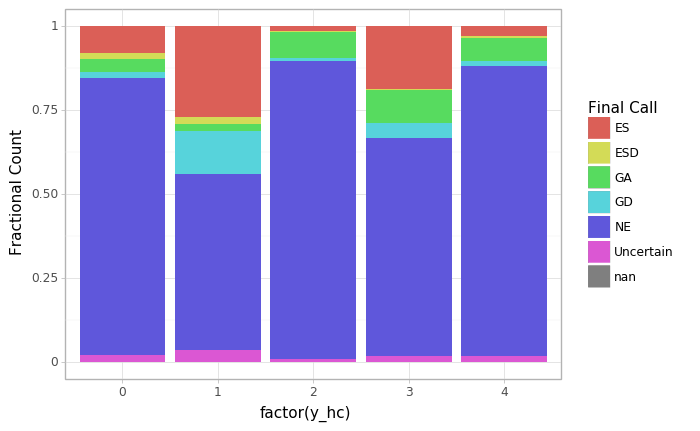

<ggplot: (8728004606741)>

In [30]:
(ggplot(lfc, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Final Call'), position='fill')+theme_light()+ylab('Fractional Count'))

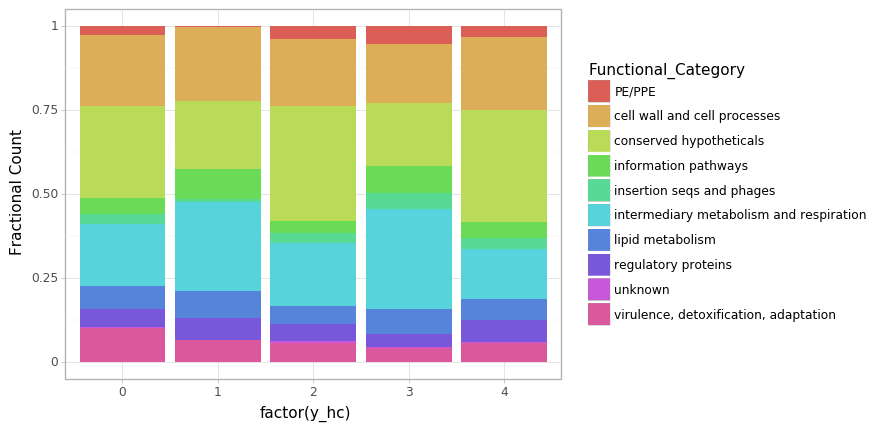

<ggplot: (8728005145045)>

In [31]:
(ggplot(lfc, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Functional_Category'), position='fill')+theme_light()+ylab('Fractional Count'))

In [32]:
lfc.to_csv('results/clustering_lfc_genes.csv', index=False)